In [1]:
from sklearn.impute import SimpleImputer

import os
import pandas as pd
import numpy as np
import random
import pickle
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LogisticRegression
from sklearn import neighbors, datasets
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier


from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from collections import Counter
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, \
                            silhouette_score, recall_score, precision_score, make_scorer, \
                            roc_auc_score, f1_score, precision_recall_curve


In [2]:
loan_training_set4 = pd.read_csv('Loan_training_set_4_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set3 = pd.read_csv('Loan_training_set_3_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set2 = pd.read_csv('Loan_training_set_2_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
loan_training_set1 = pd.read_csv('Loan_training_set_1_4.csv', sep = ',' , skiprows=1, skipfooter=2, engine = "python")
frames = [loan_training_set1, loan_training_set2, loan_training_set3,loan_training_set4]
total_lendingclub = pd.concat(frames)

In [129]:
df = total_lendingclub.loc[:, loan_training_set1.columns.isin(["loan_status", "annual_inc",
"annual_inc_joint",
"application_type",
"dti",
"dti_joint",
"emp_length",
"grade",
"home_ownership",
"loan_amnt",
"mort_acc",
"open_act_il",
"open_rv_12m",
"pct_tl_nvr_dlq",
"pub_rec",
"pub_rec_bankruptcies",
"purpose",
"term",
"tot_coll_amt"
"tot_cur_bal",
"total_acc",
"int_rate",
"rating_fico"
])]



In [85]:
df = df[df["loan_status"]!="Current"]

In [86]:
df.isnull().sum()

loan_amnt                    0
term                         0
int_rate                     0
grade                        0
emp_length               25086
home_ownership               0
annual_inc                   0
loan_status                  0
purpose                      0
dti                         21
pub_rec                      0
total_acc                    0
application_type             0
annual_inc_joint        460541
dti_joint               460541
open_act_il             430839
open_rv_12m             430839
mort_acc                     0
pct_tl_nvr_dlq               0
pub_rec_bankruptcies         0
tax_liens                    0
disbursement_method          0
dtype: int64

## Variables numéricas

In [87]:
int_numeric = df["int_rate"].str.strip("%")
int_numeric = pd.to_numeric(int_numeric)
df["int_rate"] = int_numeric


In [88]:
from sklearn.impute import SimpleImputer

numericas = df.select_dtypes(exclude=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

In [89]:
numericas_df = df.select_dtypes(exclude=['object'])

In [10]:
numericas_df

,loan_amnt,int_rate,annual_inc,dti,pub_rec,total_acc,annual_inc_joint,dti_joint,open_act_il,open_rv_12m,mort_acc,pct_tl_nvr_dlq,pub_rec_bankruptcies
8,11575,7.35,153000.0,16.99,1,46,NaN,NaN,1.0,2.0,2,95.7,1
10,7200,24.85,50000.0,6.07,0,5,NaN,NaN,1.0,0.0,0,80.0,0
24,7500,7.35,110000.0,13.12,0,27,NaN,NaN,4.0,1.0,4,100.0,0
42,10000,16.02,51979.0,10.11,2,21,NaN,NaN,1.0,2.0,0,100.0,2
91,14000,16.02,75000.0,10.86,0,10,NaN,NaN,2.0,2.0,1,90.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,11575,15.59,25400.0,27.08,0,18,NaN,NaN,NaN,NaN,0,100.0,0
421089,12000,11.99,63000.0,23.69,0,61,NaN,NaN,NaN,NaN,1,98.3,0
421092,13000,15.99,35000.0,30.90,1,22,NaN,NaN,NaN,NaN,0,100.0,1
421093,12000,19.99,64400.0,27.19,0,20,NaN,NaN,NaN,NaN,0,95.0,0


## Variables categóricas

In [90]:
from sklearn.preprocessing import OneHotEncoder

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])


In [91]:
categoricas = df.select_dtypes(include=['object']).drop(['loan_status'], axis=1).columns

categoricas

Index(['term', 'grade', 'emp_length', 'home_ownership', 'purpose',
       'application_type', 'disbursement_method'],
      dtype='object')

In [92]:
categoricas_df = df.select_dtypes(include=['object']).drop(['loan_status'], axis=1)

In [93]:
categoricas_df

,term,grade,emp_length,home_ownership,purpose,application_type,disbursement_method
8,36 months,A,6 years,OWN,credit_card,Individual,Cash
10,36 months,E,2 years,RENT,debt_consolidation,Individual,Cash
24,36 months,A,7 years,MORTGAGE,debt_consolidation,Individual,Cash
42,60 months,C,7 years,RENT,debt_consolidation,Individual,Cash
91,36 months,C,7 years,MORTGAGE,debt_consolidation,Individual,Cash
...,...,...,...,...,...,...,...
421088,36 months,D,10+ years,RENT,credit_card,Individual,Cash
421089,36 months,B,< 1 year,MORTGAGE,credit_card,Individual,Cash
421092,60 months,D,5 years,RENT,debt_consolidation,Individual,Cash
421093,60 months,E,1 year,RENT,debt_consolidation,Individual,Cash


## Concatenación

In [94]:
loan_status = pd.DataFrame(df['loan_status'])

In [95]:
lendingclub = pd.concat([numericas_df, loan_status, categoricas_df],  axis=1)

In [96]:
from sklearn.compose import ColumnTransformer


preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numericas),
        ('cat', categorical_transformer, categoricas)])

In [97]:
lendingclub['loan_status'].mask(lendingclub['loan_status'] == 'Fully Paid', 1, inplace=True)
lendingclub['loan_status'].mask(lendingclub['loan_status'] != 1, 0, inplace=True)
lendingclub

,loan_amnt,int_rate,annual_inc,dti,pub_rec,total_acc,annual_inc_joint,dti_joint,open_act_il,open_rv_12m,...,pub_rec_bankruptcies,tax_liens,loan_status,term,grade,emp_length,home_ownership,purpose,application_type,disbursement_method
8,11575,7.35,153000.0,16.99,1,46,NaN,NaN,1.0,2.0,...,1,0,1,36 months,A,6 years,OWN,credit_card,Individual,Cash
10,7200,24.85,50000.0,6.07,0,5,NaN,NaN,1.0,0.0,...,0,0,1,36 months,E,2 years,RENT,debt_consolidation,Individual,Cash
24,7500,7.35,110000.0,13.12,0,27,NaN,NaN,4.0,1.0,...,0,0,1,36 months,A,7 years,MORTGAGE,debt_consolidation,Individual,Cash
42,10000,16.02,51979.0,10.11,2,21,NaN,NaN,1.0,2.0,...,2,0,1,60 months,C,7 years,RENT,debt_consolidation,Individual,Cash
91,14000,16.02,75000.0,10.86,0,10,NaN,NaN,2.0,2.0,...,0,0,1,36 months,C,7 years,MORTGAGE,debt_consolidation,Individual,Cash
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
421088,11575,15.59,25400.0,27.08,0,18,NaN,NaN,NaN,NaN,...,0,0,1,36 months,D,10+ years,RENT,credit_card,Individual,Cash
421089,12000,11.99,63000.0,23.69,0,61,NaN,NaN,NaN,NaN,...,0,0,0,36 months,B,< 1 year,MORTGAGE,credit_card,Individual,Cash
421092,13000,15.99,35000.0,30.90,1,22,NaN,NaN,NaN,NaN,...,1,0,0,60 months,D,5 years,RENT,debt_consolidation,Individual,Cash
421093,12000,19.99,64400.0,27.19,0,20,NaN,NaN,NaN,NaN,...,0,0,0,60 months,E,1 year,RENT,debt_consolidation,Individual,Cash


# Logistic Regression

La regresión logística es un algoritmo de clasificación de aprendizaje automático que se utiliza para predecir la probabilidad de una variable dependiente categórica. En la regresión logística, la variable dependiente es una variable binaria que contiene datos codificados como 1 (sí, éxito, etc.) o 0 (no, fracaso, etc.). En otras palabras, el modelo de regresión logística predice P (Y = 1) en función de X.


#### Supuestos de regresión logística

* La regresión logística binaria requiere que la variable dependiente sea binaria.
* Para una regresión binaria, el nivel de factor 1 de la variable dependiente debe representar el resultado deseado.
* Solo deben incluirse las variables significativas.
* Las variables independientes deben ser independientes entre sí. Es decir, el modelo debe tener poca o ninguna multicolinealidad.
* Las variables independientes están relacionadas linealmente con las probabilidades logarítmicas.
* La regresión logística requiere tamaños de muestra bastante grandes.
* Teniendo en cuenta las suposiciones anteriores, veamos nuestro conjunto de datos.

In [115]:
from sklearn.model_selection import train_test_split
a =lendingclub.sample(n=462191 , random_state=12354)


X = a.drop('loan_status', axis=1)
y = a['loan_status']


y = y.astype("int")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [116]:
log = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression())])

In [117]:
log.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec', 'total_acc',
       'annual_inc_joint', 'dti_joint', 'open_act_il', 'open_rv_12m',
       'mort_acc', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                               

In [118]:
y_pred = log.predict(X_test)

In [119]:
print('Accuracy: %.4f'%accuracy_score(y_test, y_pred))
print('AUC: %.4f'%roc_auc_score(y_test, y_pred))
print('F1-Score: %.4f'%f1_score(y_test, y_pred))

print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))


Accuracy: 0.7569
AUC: 0.5578
F1-Score: 0.8552

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.57      0.16      0.24     23326
           1       0.77      0.96      0.86     69113

    accuracy                           0.76     92439
   macro avg       0.67      0.56      0.55     92439
weighted avg       0.72      0.76      0.70     92439



# Tune

In [110]:
param_grid = {
    'classifier__C': [0.19 , 0.15, 0.14],
    'classifier__solver':[ 'lbfgs',  'sag'],
    'classifier__penalty': ['l2']
}
from sklearn.model_selection import GridSearchCV
CV = GridSearchCV(log, param_grid, n_jobs= 3)
                  
CV.fit(X_train, y_train)  
print(CV.best_params_)    
print(CV.best_score_)

{'classifier__C': 0.14, 'classifier__penalty': 'l2', 'classifier__solver': 'sag'}
0.7559550890538712


The max_iter was reached which means the coef_ did not converge


In [120]:
log = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', LogisticRegression(C= 0.14,penalty= 'l2', solver="lbfgs"))])

In [121]:
log.fit(X_train, y_train)

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  Index(['loan_amnt', 'int_rate', 'annual_inc', 'dti', 'pub_rec', 'total_acc',
       'annual_inc_joint', 'dti_joint', 'open_act_il', 'open_rv_12m',
       'mort_acc', 'pct_tl_nvr_dlq', 'pub_rec_bankruptcies', 'tax_liens'],
      dtype='object')),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(fill_value='missing',
                               

In [122]:
y_pred = log.predict(X_test)

# SCORING MODELO FINAL

In [123]:
print('Accuracy: %.4f'%accuracy_score(y_test, y_pred))
print('AUC: %.4f'%roc_auc_score(y_test, y_pred))
print('F1-Score: %.4f'%f1_score(y_test, y_pred))

print('\nClassification Report                       : ')
print(classification_report(y_test, y_pred))


Accuracy: 0.7569
AUC: 0.5576
F1-Score: 0.8552

Classification Report                       : 
              precision    recall  f1-score   support

           0       0.57      0.16      0.24     23326
           1       0.77      0.96      0.86     69113

    accuracy                           0.76     92439
   macro avg       0.67      0.56      0.55     92439
weighted avg       0.72      0.76      0.70     92439



In [61]:
# Save to file in the current working directory
logistic_regression_pkl = "logistic_regression.pkl"
with open(logistic_regression_pkl, 'wb') as file:
    pickle.dump(log, file)

# PLOTING

Confusion matrix, without normalization
[[ 3593 19786]
 [ 2663 66397]]
Normalized confusion matrix
[[0.15368493 0.84631507]
 [0.03856067 0.96143933]]


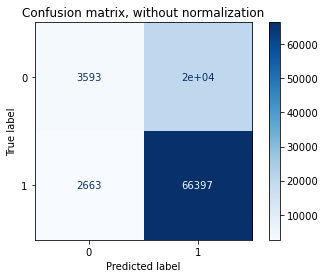

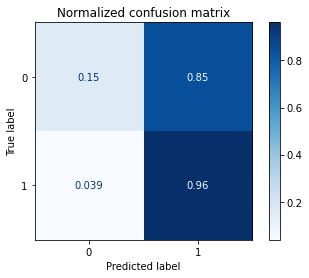

In [62]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = plot_confusion_matrix(log, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()


In [125]:
prob_predictions = log.predict_proba(X_test)

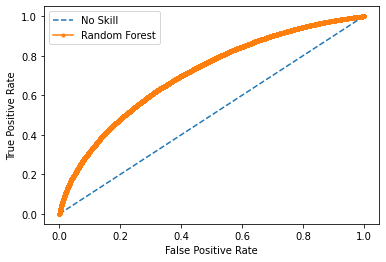

In [126]:
# keep probabilities for the positive outcome only
yhat = prob_predictions[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [65]:
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

In [66]:
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))

Best Threshold=0.745141, G-Mean=0.654


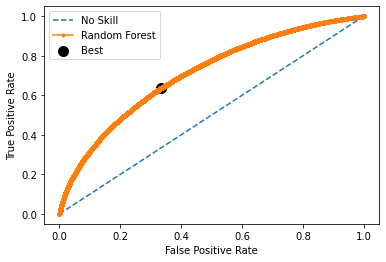

In [127]:
# plot the roc curve for the model
plt.plot([0,1], [0,1], linestyle='--', label='No Skill')
plt.plot(fpr, tpr, marker='.', label='Random Forest')
plt.scatter(fpr[ix], tpr[ix], s=100, marker='o', color='black', label='Best')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
# show the plot
plt.show()

In [68]:
# calculate pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, yhat)

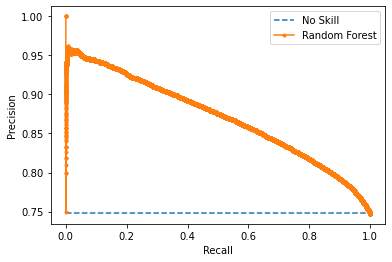

In [128]:
# plot the roc curve for the model
no_skill = len(y_test[y_test==1]) / len(y_test)
plt.plot([0,1], [no_skill,no_skill], linestyle='--', label='No Skill')
plt.plot(recall, precision, marker='.', label='Random Forest')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
# show the plot
plt.show()

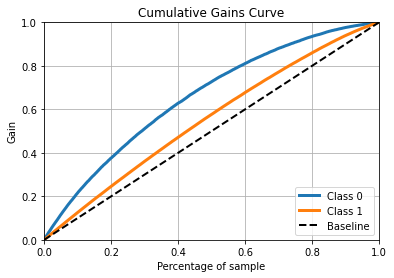

In [70]:
import scikitplot as skplt
import matplotlib.pyplot as plt

skplt.metrics.plot_cumulative_gain(y_test, prob_predictions)
plt.show()